![alttext](logo.png)

# Unidad 4:  Hipótesis y correlación - Sesión 1


## Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías básicas para el análisis de datos
* Descarge e importe el archivo `nations.csv`. _warning_: va a encontrar un error en el formato ¿Cómo lo podemos solucionar?.


* La base de datos contiene información a nivel mundial sobre demografía:
    * `country`: País.
    * `region`: Continente del país.
    * `gdp`: Producto Interno Bruto per cápita, precios 2005.
    * `school`: Promedio años de escolaridad.
    * `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
    * `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
    * `life`: Esperanza de vida al nacer.
    * `pop`: Población total.
    * `urban`: Porcentaje de población urbana.
    * `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
    * `literacy`: Tasa de alfabetismo.
    * `co2`: Toneladas de Co2 mitidas per cápita.
    * `gini`: Coeficiente de desigualdad del ingreso.


* Apellidos desde la A hasta la N: Enfocarse en las variables `chldmort`, `adfert` y `life`.
* Apellidos desde la M hasta la Z: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [1]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización

In [4]:
df =pd.read_csv('nations.csv', encoding='iso-8859-1')

## Ejercicio 2:A continuación se presenta una serie de gráficos construídos con `matplotlib`. Se le pide refactorizarlos utilizando `seaborn`.
* Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.



```python
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

binarize_histogram(df, 'adfert')
```


![png](gfx/activities-w4_4_0.png)

In [10]:
df_test.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,binarize
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,0
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,1
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,0


## Gráfico 1 con Seaborn

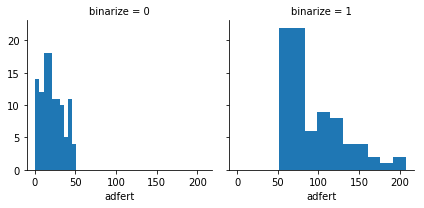

In [38]:
df_test['binarize'] = np.where(df_test['adfert'] > np.mean(df_test['adfert']), 1, 0)
grid = sns.FacetGrid(df_test, col="binarize", col_wrap=2)
grid = grid.map(plt.hist, "adfert")

Los que están sobre la media están muchos más dispersos, con la mayoría concentrados cerca a la media. En cambio, los que están bajo la media son más concentrados, pero más alejados que la media.

```python
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
        
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
        
grouped_boxplot(df, 'adfert', 'region')
```


![png](gfx/activities-w4_5_0.png)

## Grafico 2

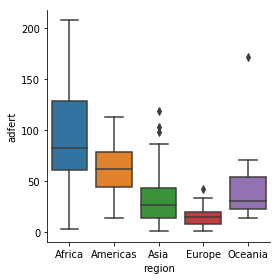

In [54]:
 g = sns.factorplot(x='region', y='adfert', data= df, kind="box")

```python
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
        
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

grouped_scatterplot(df, 'school', 'adfert', 'region')
```


![png](gfx/activities-w4_7_0.png)

África muestra alta fertilidad adolescente y una gran variación entre países., en cambio europa presenta baja fertilidad adolescente, lo que puede significar que los europeos postergan su paternidad.

## Gráfico 3

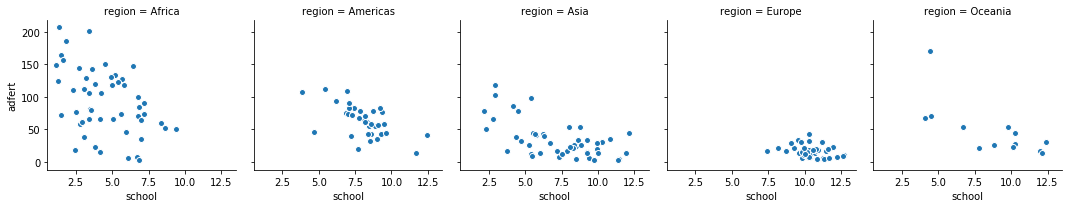

In [57]:
g = sns.FacetGrid(df, col="region")
g = g.map(plt.scatter, "school", "adfert", edgecolor="w")

Podemos notar que en África, America y Asia bajo nivel de escolaridad influye en el nivel de fertilidad adolescente. Sin embargo, si nos fijamos en Europa y Oceania, notamos que el nivel de escolaridad no influye tanto en en el 

## Ejercicio 3: Genere un heatmap entre todas las variables.
* En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6


In [60]:
df_subset = df.loc[: , ['chldmort','adfert','life']]

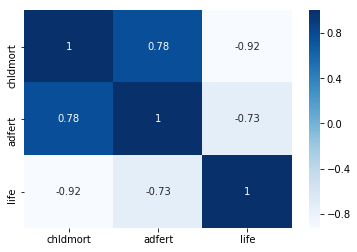

In [64]:
corr_mat = df_subset.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True);

Hay una correlacion positiva entre la mortandad infantil y la fertilidad adolescente. La correlación entre la mortandad infantil y la expectativa de vida, y entre la fertilidad adolescente y la expectativa de vida es altamente negativa.

## Ejercicio 4: En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones
* _tip_: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = `df.loc[:,['variables', 'a', 'agregar']]`. No olvide agregar la variable `region`.
* _tip_: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.

In [65]:
df_subset_region = df.loc[: , ['region','chldmort','adfert','life']]

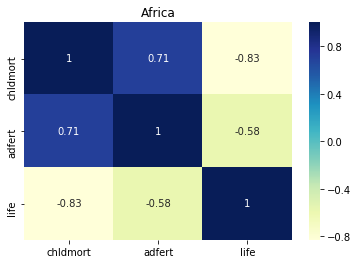

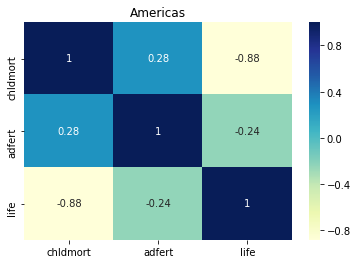

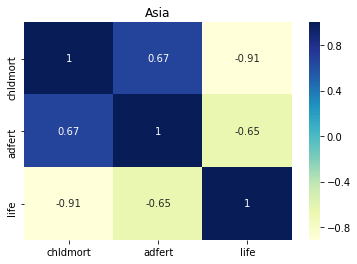

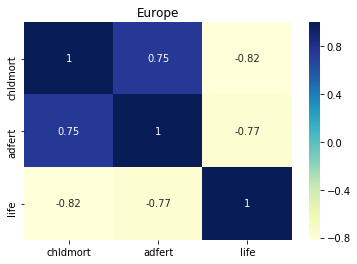

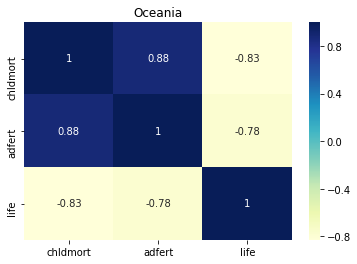

In [90]:
for i in df_subset_region['region'].unique():
    corr_mat = df_subset[df_subset_region['region']==i].corr()
    plt.figure()
    plt.title(i)
    sns.heatmap(corr_mat, cmap='YlGnBu', annot=True);

Todas se comportan de manera bastante similar (Hay una correlacion positiva entre la mortandad infantil y la fertilidad adolescente. La correlación entre la mortandad infanti y la expectativa de vida, y de la fertilidad adolescente y la expectativa de vida es altamente negativa), excepto por America, donde no hay correlación fuerte entre la fertilidad femenina y la mortandad infantil, ni entre la fertilidad femenina y la expectativa de vida.